In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set(rc = {'figure.figsize':(10,8)})
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings 
warnings.filterwarnings('ignore')

## Data Cleaning

In [2]:
#load data
df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
df.drop_duplicates(subset='App',inplace=True)
df = df.dropna()

In [5]:
#remove '+' and ',' from column Installs
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda y: y.replace(',','') if ',' in str(y) else y)
#convert values to integer
df['Installs'] = df['Installs'].apply(lambda x: int(x))
#remove $ from price
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
#convert reviews to integer
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [6]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Category

In [7]:
app_ca = df['Category'].value_counts().sort_values(ascending =True)
cate = [go.Pie(labels = app_ca.index,
              values = app_ca.values,
              hoverinfo = 'label+value')]
py.iplot(cate, filename = 'active_category')

Top 5 category: Family, Game, Tools, Finance, Productivity.

## Rating

In [8]:
df['Rating'].describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Ratings')

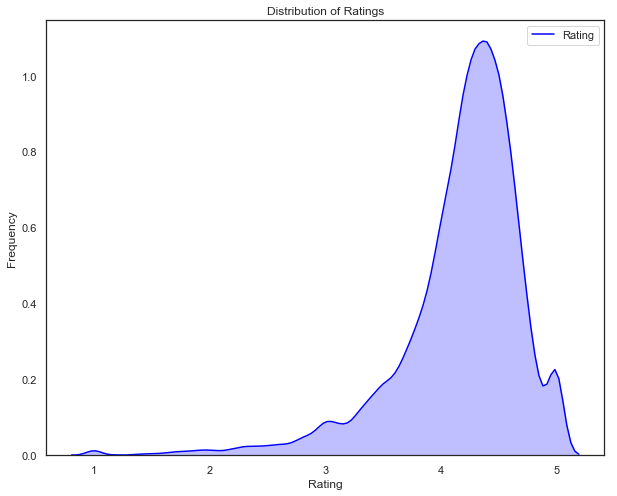

In [9]:
sns.set(rc = {'figure.figsize':(10,8)},style='white')
r = sns.kdeplot(df.Rating, color = 'Blue', shade =True)

r.set_xlabel('Rating')
r.set_ylabel('Frequency')
plt.title('Distribution of Ratings')


Average rating: 4.17

## Type: Free or Paid?

In [10]:
df['Type'].value_counts(sort =True)

Free    7588
Paid     602
Name: Type, dtype: int64

Text(0.5, 1.0, 'Type Portion')

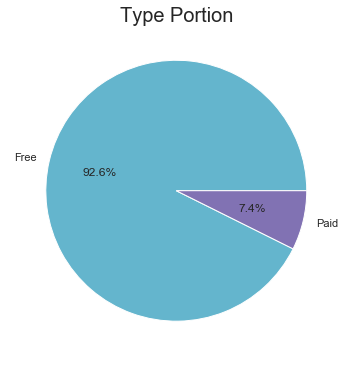

In [11]:
sns.set(rc = {'figure.figsize':(6,6)},style='white')
portion = df['Type'].value_counts(sort = True)
labels = df['Type'].value_counts(sort =True).index
plt.pie(portion, labels = labels, colors = ('c','m'), autopct = '%1.1f%%')
plt.title('Type Portion', size=20)

92.6% of apps are Free apps.

In [12]:
#Take a closer look at paid apps
paid_apps =df[df.Type == 'Paid']

In [13]:
paid_apps['Price'].describe()

count    602.000000
mean      14.126279
std       60.744377
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

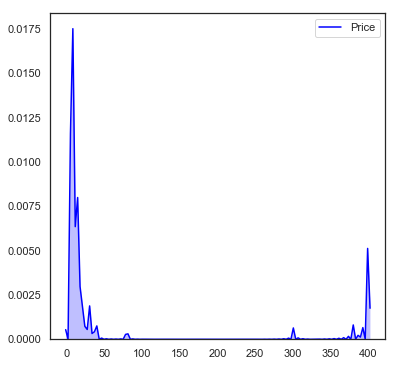

In [14]:
paid_plot = sns.kdeplot(paid_apps['Price'], color = 'Blue', shade =True)

Most apps are priced between $1 and $30, there are a few apps priced $400!

In [15]:
#Apps with price over $200
df[['Category', 'App']][df.Price > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


Those apps are regarded as juck apps with names like 'I am rich', 'most expensive app'.

Text(0.5, 1.0, 'App prices for different categories after filtering junk apps')

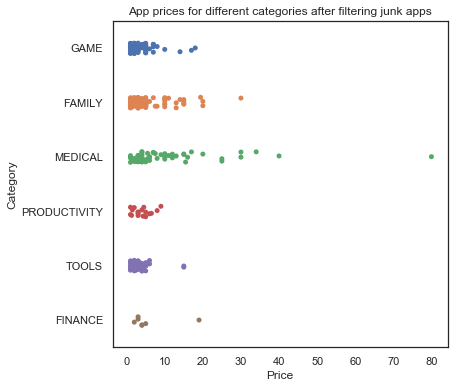

In [16]:
#Drop apps with price over 100
paid_apps2 = paid_apps[paid_apps.Price<100]
#Top 5 categories
paid_apps2 = paid_apps2[paid_apps2.Category.isin(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'PRODUCTIVITY','MEDICAL'])]
sns.stripplot(x='Price',y='Category',data=paid_apps2,jitter=True)
plt.title('App prices for different categories after filtering junk apps')

Medical and Family apps are the most expensive. Most game apps are priced below $10.

### Number of downloads of paid apps Vs free apps

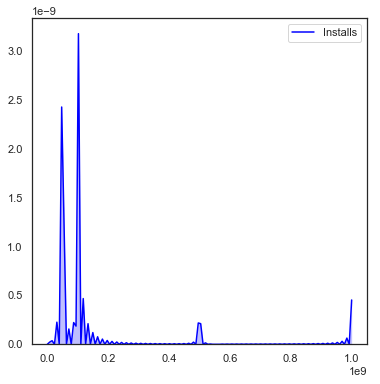

In [17]:
sns.kdeplot(df['Installs'], color = 'Blue', shade =True)

In [18]:
d0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(180, 50, 100)',
    )

)
d1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 50, 100)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [d0, d1]
py.iplot({'data': data, 'layout': layout})

Installs of **paid** apps are smaller than that of **free** apps.

## Exploring Correlations

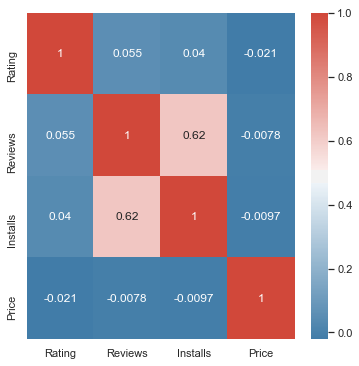

In [19]:
corrmat =df.corr()
sns.heatmap(corrmat,annot=True,cmap=sns.diverging_palette(600, 15, as_cmap=True))

A positive correlation of 0.62 exists between the number of installs and the number of reviews. Customers are more likely to download an app if it's reviewed by many other customers.